In [118]:
import matplotlib.pyplot as plt
import numpy as np
from mylib import *
from skimage.segmentation import mark_boundaries, slic
from skimage.measure import label, regionprops, regionprops_table
from copy import deepcopy
%matplotlib notebook

In [53]:
secao = np.load('secao_do_plug.npy')

In [54]:
#secao = secao[::2,::2]
#sem reduzir a secao, as borda ficam mais suaves.

In [55]:
mascara = secao > 0

In [56]:
secao = secao.astype(float)
vmax = np.amax(secao)
vmin = np.amin(secao)
secao = (secao - vmin)/(vmax - vmin)

<IPython.core.display.Javascript object>


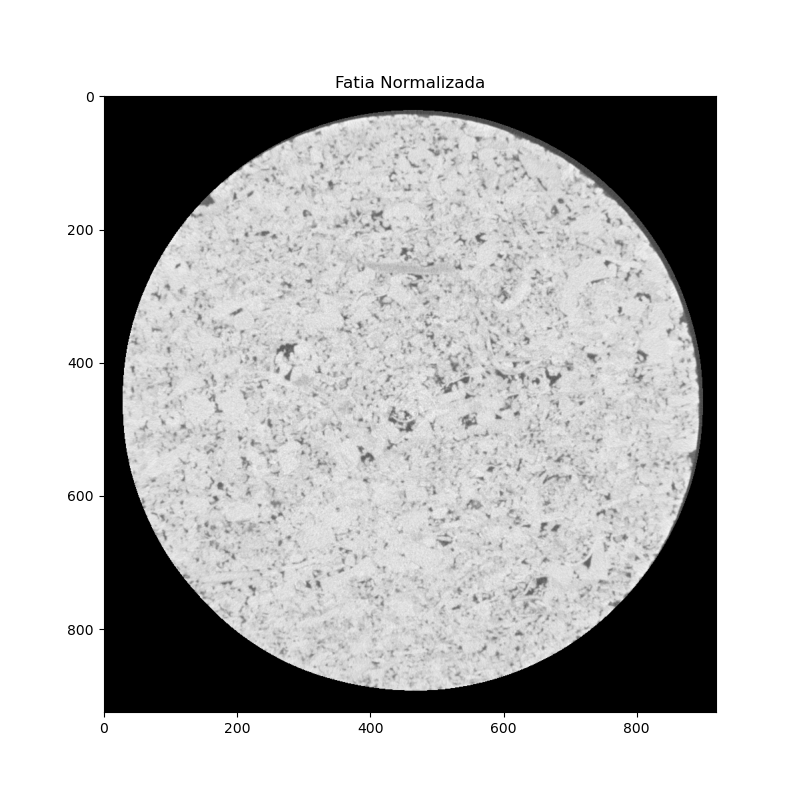

In [57]:
show_gray(secao, "Fatia Normalizada")

<IPython.core.display.Javascript object>


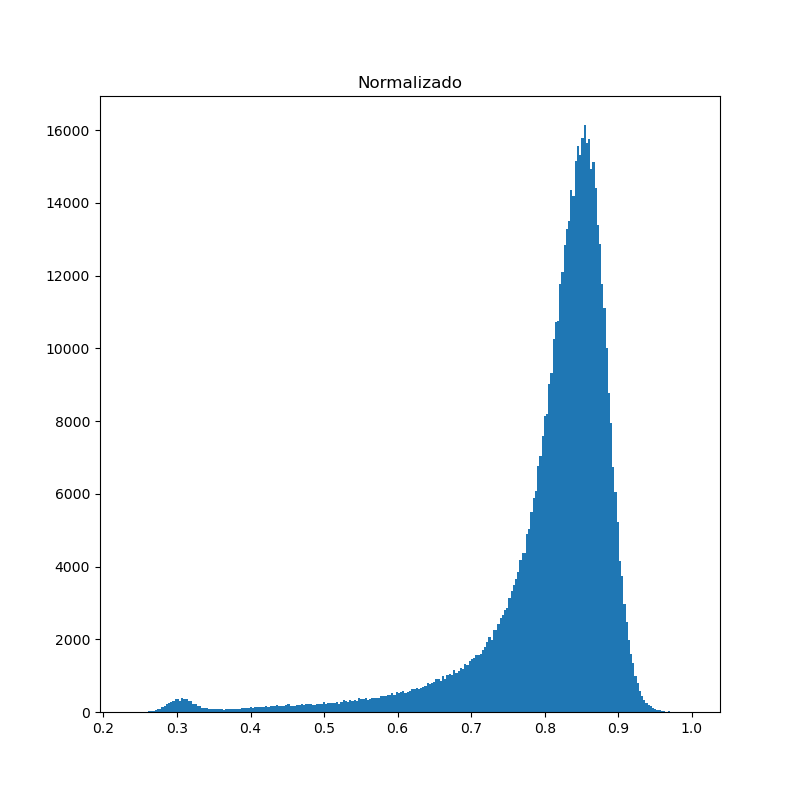

In [58]:
show_hist(secao[mascara].ravel(), "Histograma")

In [60]:
n_sp = 5000

In [202]:
segmentos = slic(secao, n_segments=n_sp, compactness=0.06, slic_zero=False, mask=mascara)

In [203]:
img_sp = mark_boundaries(secao, segmentos, (1,0,0))

<IPython.core.display.Javascript object>


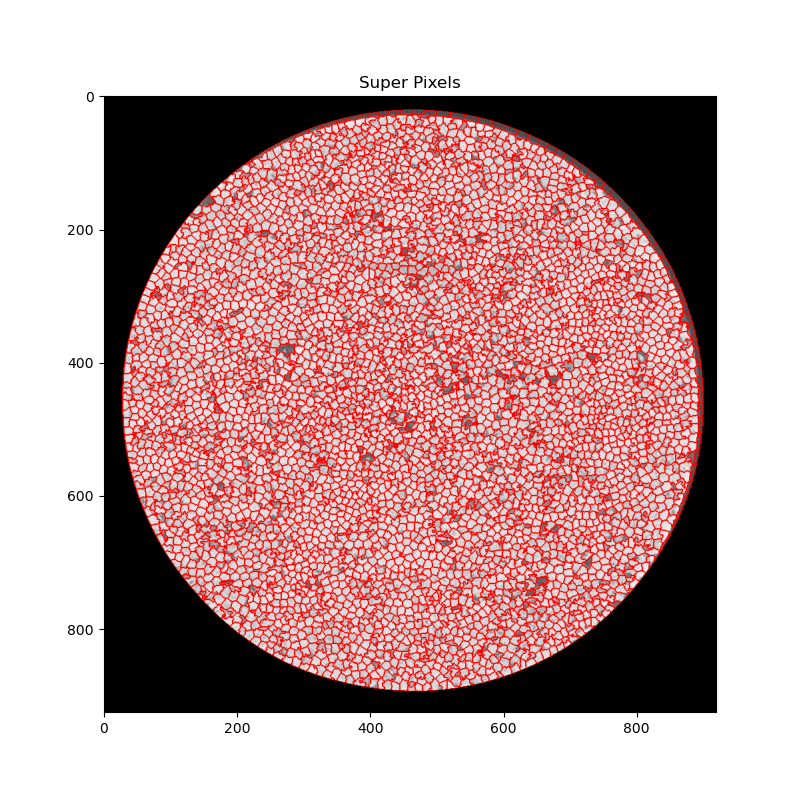

In [204]:
show_rgb(img_sp, "Super Pixels")

In [205]:
label_img = label(segmentos)
regions = regionprops(label_img, intensity_image=secao)

In [206]:
ys = []
xs = []
for props in regions:
    centroide = props.centroid
    ys.append(centroide[0])
    xs.append(centroide[1])

In [207]:
def show_centroids(img, title):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(img, cmap=plt.cm.gray)

    for i in range(len(ys)):
        ax.plot(xs[i], ys[i], '.k', markersize=3)

    ax.axis((0, secao.shape[1], secao.shape[0], 0))
    plt.title(title)
    plt.show()

<IPython.core.display.Javascript object>


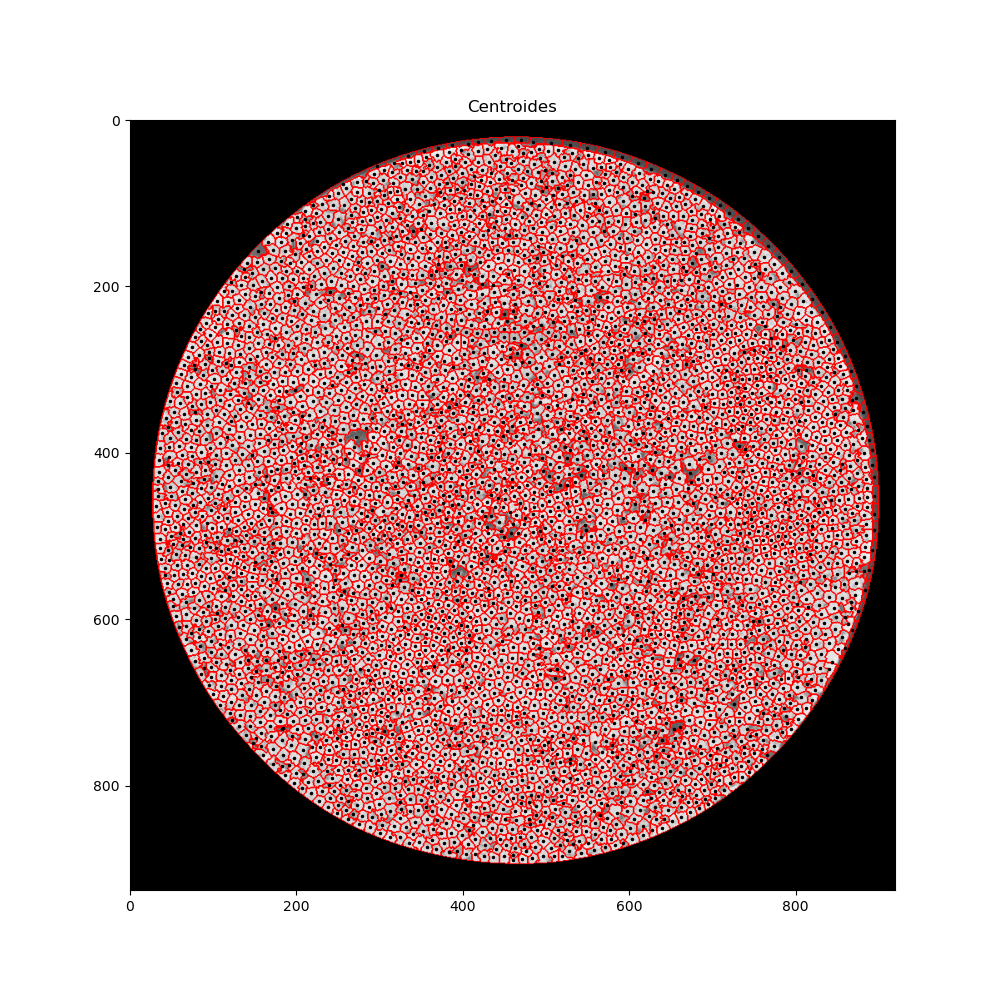

In [208]:
show_centroids(img_sp, "Centroides")

In [209]:
img_mean = deepcopy(secao)

for props in regions:
    mean = props.mean_intensity;
    coords = props.coords
    for i in range(coords.shape[0]):
        img_mean[coords[i][0]][coords[i][1]] = mean

<IPython.core.display.Javascript object>


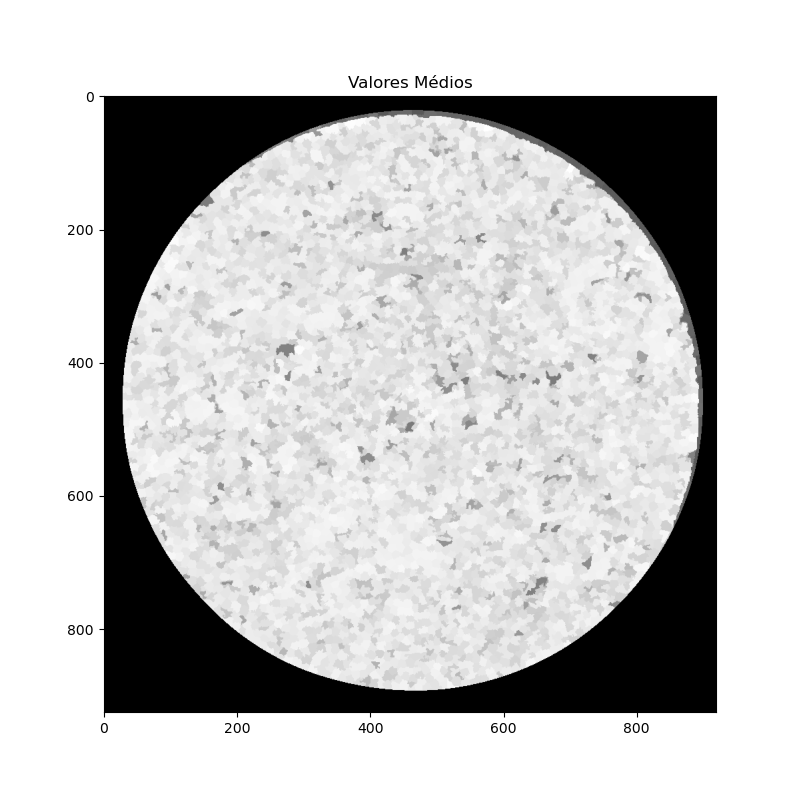

In [210]:
show_gray(img_mean, "Valores Médios")

In [211]:
img_sp_mean = mark_boundaries(img_mean, segmentos, (1,0,0))

<IPython.core.display.Javascript object>


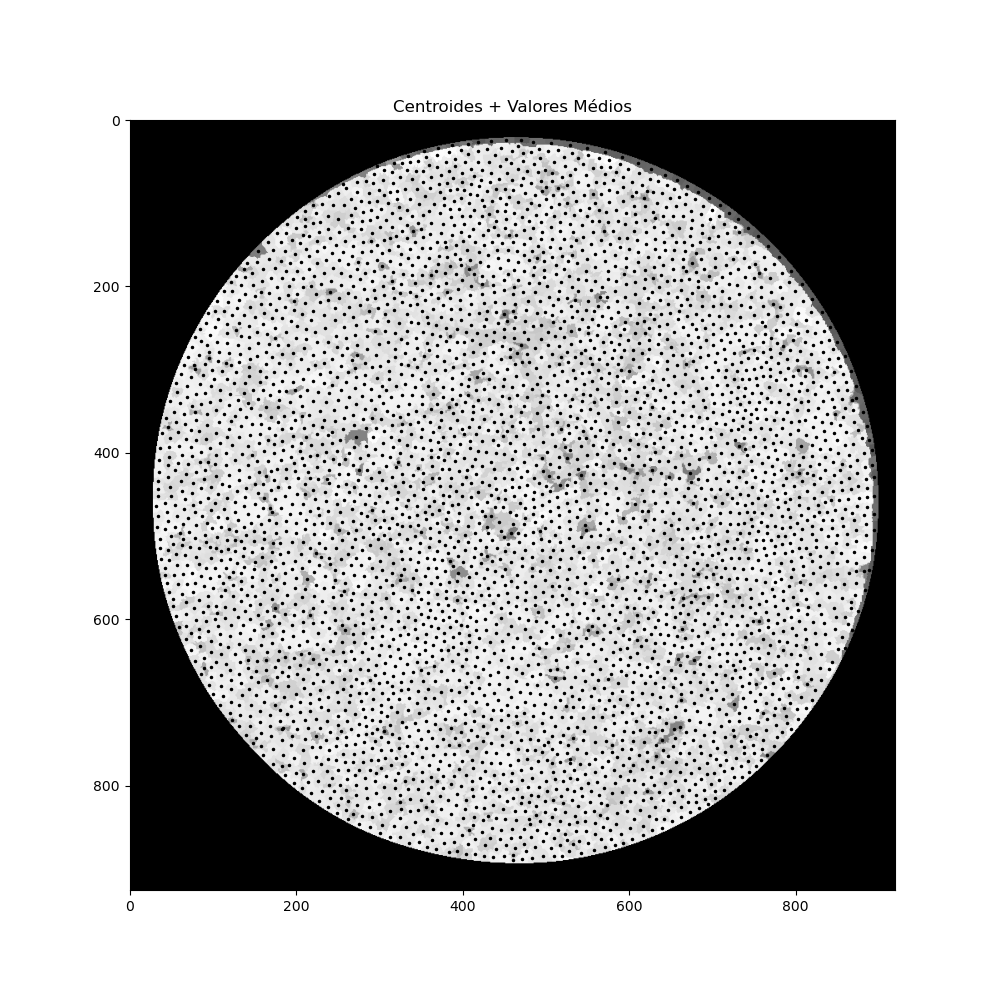

In [212]:
show_centroids(img_mean, "Centroides + Valores Médios")

<IPython.core.display.Javascript object>


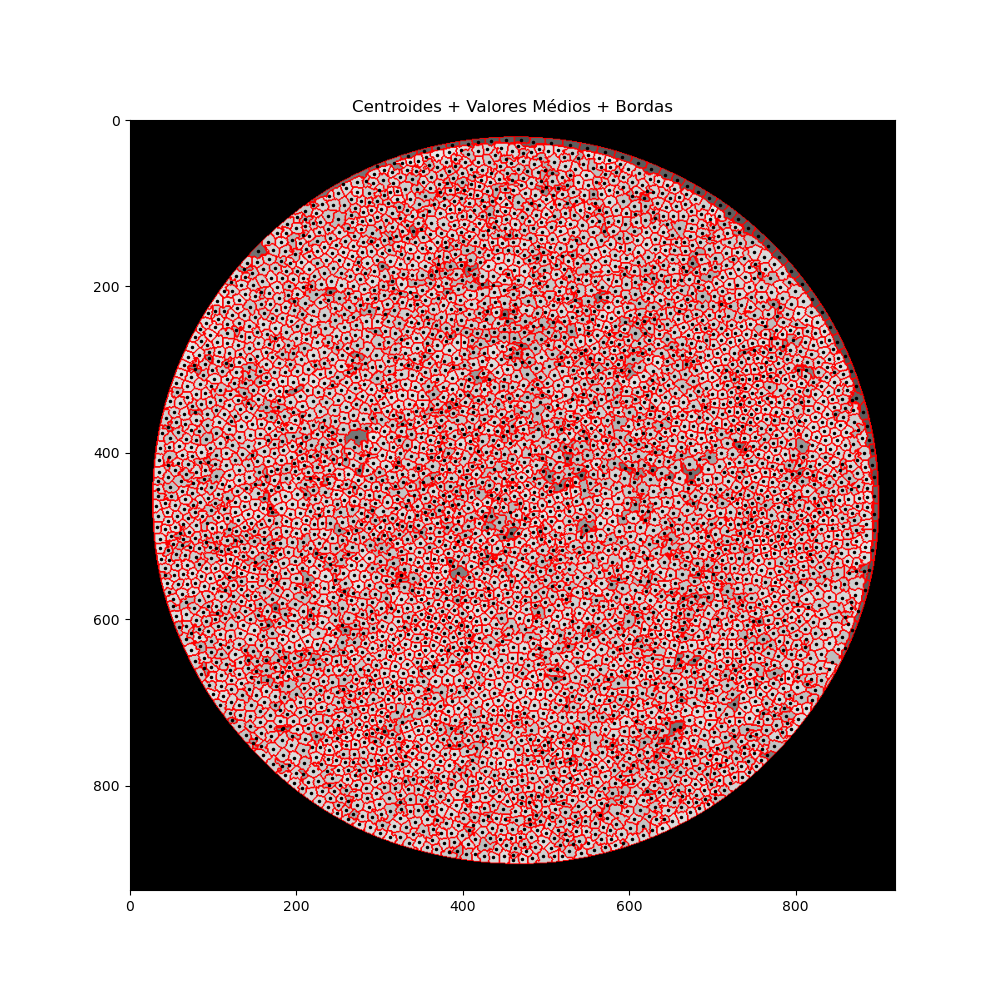

In [213]:
show_centroids(img_sp_mean, "Centroides + Valores Médios + Bordas")

In [219]:
img_error = deepcopy(secao)

for props in regions:
    mean = props.mean_intensity
    intensity = props.intensity_image
    coords = props.coords
    error = np.square(intensity - mean).mean()
    for i in range(coords.shape[0]):
        img_error[coords[i][0]][coords[i][1]] = error

<IPython.core.display.Javascript object>


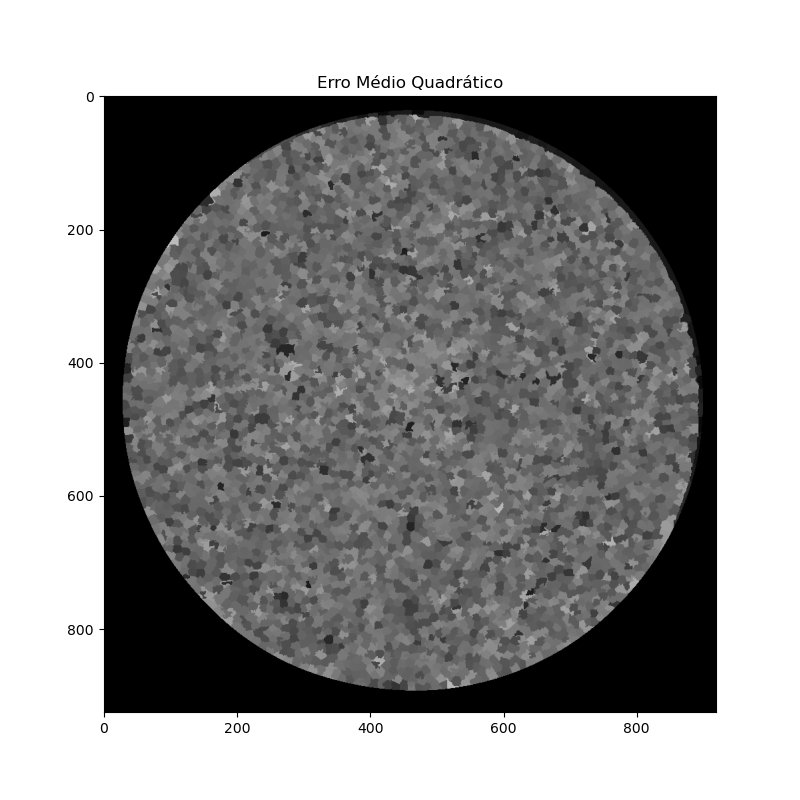

In [221]:
show_gray(img_error, "Erro Médio Quadrático")

In [229]:
print("Erro médio absoluto:", np.abs(img_mean - secao).mean())
print("Erro médio quadrático:", np.square(img_mean - secao).mean())

Erro médio absoluto: 0.025144023751576997
Erro médio quadrático: 0.001988332915214989
